In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.tokenize import sent_tokenize
pd.set_option('max_colwidth', None)

In [2]:
max_features = 50

In [3]:
labeled_data = pd.read_csv('generated_snippets.csv').drop(columns=['Unnamed: 0'])
labeled_data.guidance = labeled_data.guidance.astype(int)
labeled_data = labeled_data.dropna().reset_index()
labeled_data['snippets']=labeled_data['snippets'].str.replace('\\n\\n','',regex=True)
labeled_data.head()
dataset = labeled_data

In [4]:

vectorizer = TfidfVectorizer (max_features=max_features, min_df=7, max_df=0.8)
tokenized_data = vectorizer.fit_transform(dataset['snippets']).toarray()

In [5]:

labels = np.array(dataset["guidance"])  # Label is already an array of 0 and 1

rf = RandomForestClassifier(n_estimators=100)
X = tokenized_data
y = labels
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)
rf.fit(X_train,y_train)
lr = LogisticRegression(solver='liblinear', max_iter=10000).fit(X_train, y_train)



In [6]:
labeled_data

,index,snippets,guidance
0,0,We anticipate net charge-offs to remain within a range of 3.9% to 4.3% for next year.,1
1,1,"We continue to monitor macroeconomic trends and the outlook for our customers and our industry, and we may make further adjustments to our outlook if developments indicate a need for us to change course. We are well positioned to deliver strong results for our shareholders regardless of what comes next.",1
2,2,"We understand the responsibility we have to manage our credit risks carefully and responsibly, and we are committed to proactive measures to protect our customer base and our bottom line.",1
3,5,"Given these dynamics, we anticipate that net charge-offs could increase to between 4.0% and 4.4% over the course of 2023. This range is in line with our expectations for the macroeconomic environment, while preserving the balance between responsible lending and keeping the cost of funds competitive.",1
4,6,"Longer-term, we expect charge-off rates to normalize within a range between 2.5% and 3.5%. Depending on absolute levels of charge-offs, our business strategy could be impacted if we are unable to absorb higher-than-anticipated levels. We consider this risk as part of our overall risk management process and will actively monitor charge-off levels to ensure that our business continues to perform in an effective manner.",1
...,...,...,...
817,995,"Additionally, we grew deposits by 22%, driven largely by our robust mobile capabilities and digital offerings that appeal to new customers. Finally, beyond our strong financial performance, we also saw customer satisfaction with our services increase by 7%, a testament to the investments we’ve made in customer experience.",0
818,996,"Second, operating income grew by 17%, driven by strong volume growth, increased productivity and improved expense management. This is reflective of our ongoing commitment to drive long-term value and generate consistent results.Finally, our customer satisfaction ratings remain high, indicating that existing customers are satisfied with our service.Overall, these results make it clear that our efforts are translating into meaningful value for our shareholders and that we are well-positioned to continue delivering strong returns.",0
819,997,"Second, we grew new deposits by 24% and saw a 14% improvement in deposit mix shifting more towards higher-margin products. Third, we grew net revenue year-over-year by 12%. This was driven by strong growth in both net interest income and non-interest income.Overall, these strong results exceed our expectations, demonstrate the effectiveness of our strategy, and set us up to continue leading the industry in digital banking. We are more confident than ever about our ability to drive future growth and deliver future value to our customers, employees, and shareholders.",0
820,998,"Second, our deposit accounts increased by 15%, showcasing our ability to leverage our digital platform and attract both existing and new customers. Third, we increased our market share in the mortgage segment by an impressive 28%. This indicates our growing ability to execute in this highly competitive space and is driven by our continued investment in our mortgage platform, operations and customer experience.",0


In [7]:
predictions = rf.predict(X_test)

In [8]:
round(accuracy_score(y_test, predictions),4)

0.9758

In [9]:
predictions = lr.predict(X_test)
round(f1_score(y_test, predictions),4)

0.9606

In [10]:

file_in = 'capital_one.txt'
file_out = 'capital_one.cleaned'

filex = open(file_in, 'r')
text = filex.read()
text = text.replace('\n', ' ')
text = text.replace('$', ' ')
text = text.replace('\t', ' ')
import re
text = re.sub(r'\b\.\b', '_', text)
tokens = text.split(".")
keep_tokens = []
for t in tokens:
    if len(t)>4:
        keep_tokens.append(t)
tokens = keep_tokens

target_data = {"snippets":tokens}
target_data = pd.DataFrame(target_data)
target_data['snippets']=target_data['snippets'].str.replace('\n','',regex=True)
tgt = target_data
target_data.head()


,snippets
0,I’ll start on slide 3 of tonight’s presentation
1,"In the fourth quarter, Capital One earned 1_2 billion or 3_03 per diluted common share"
2,"For the full year, Capital One earned 7_4 billion or 17_91 per share"
3,"Included in the results for the fourth quarter were two adjusting items, which collectively benefited pretax earnings by 105 million"
4,"Net of these adjustments, fourth quarter earnings per share were 2_82 and full year earnings performance share were 17_71"


In [11]:
dataset = target_data

vectorizer.fit(dataset['snippets'])
tokenized_data = vectorizer.transform(target_data['snippets']).toarray()

In [12]:
#transform(target_data['snippets']).toarray()
y_pred = rf.predict(tokenized_data)

Text(0.5, 0, 'snippets')

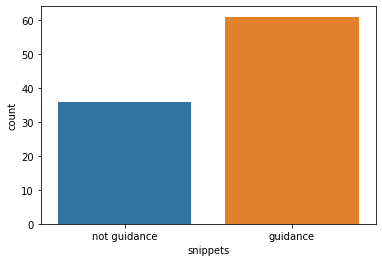

In [13]:
import seaborn as sns
sns.countplot(x=pd.DataFrame(y_pred)[0])
plt.xticks([0,1],['not guidance','guidance'])
plt.xlabel('snippets')

In [15]:

y_pred = lr.predict_proba(tokenized_data)
tgt['probability'] = pd.DataFrame(y_pred)[[1]]
tgt.sort_values('probability',ascending=False)

,snippets,probability
95,We’re focusing on efficiency improvement and we’re managing capital prudently,0.979117
57,We’re keeping a close eye on competitor actions and potential marketplace risks,0.960224
38,We continue to estimate that our longer term CET1 capital need is around 11%,0.944722
28,Total liquidity reserves increased by 14 billion to 107 billion,0.933625
14,Three things put upward pressure on our card allowance,0.913739
...,...,...
90,"Our annual operating efficiency ratio for full year 2022 was 44_5% net of adjustments, a 15 basis points improvement from full year 2021",0.027426
49,Both the charge-off rate and the delinquency rate continued to normalize and were below pre-pandemic levels,0.023074
73,"On a linked quarter basis, the charge-off rate was up 61 basis points, and the 30-plus delinquency rate was up 77 basis points",0.021885
52,"On a linked quarter basis, the charge-off rate was up 102 basis points and the delinquency rate was up 46 basis points",0.021885
